
Problem Statement:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. My work includes various plots and graphs , visualizations , feature engineering , ensemble techniques , different ML algorithms with their respective parameter tuning , analysis and trends . Predictions are of 6 weeks of daily sales for 1,115 stores located across Germany.

In this project, the Rossman challenge is being taken on. The goal is to predict the Sales of a given store on a given day. Model performance is evaluated on the root mean absolute percentage error (MAPE).

The dataset consists of two csv files: store.csv and train.csv

Data Files:

train.csv holds info about each store. store.csv holds the sales info per day for each store.

The repo contains main.py that runs the main script from step one until the end.


Bussiness problem:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

**Data and description**
Variables
1.  Sales - The turnover for any given day (this is what we are predicting).
2.  Open - An indicator for whether the store was open or closed.  0 = closed, 1 = open.
3. Store type - Differentiates between 4 different store models (a, b, c & d).
4. Assortment - Describes an assortment level: a = basic,   b = extra, c = extended.
5. Promo -  Indicates whether a store is running a promo on that day
6. Promo2 -  Promo2 is a continuing and consecutive promotion for some stores.
7.  Store - A unique Id for each store.
8.  Customer - The number of customers on a given day.
9. Competition Distance - Distance in meters to the nearest competitor store.
10. Promo Interval -   Describes   the consecutive intervals Promo2 is started, naming the months the promotion is started a new.
11. Promo2Since [Year/week] -   Describes   the year and calendar week when the store started participating in Promo2.


In [ ]:
# import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
# import file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath="/content/drive/MyDrive/Copy of Rossmann Stores Data.csv"
rossmann_df=pd.read_csv(filepath,encoding="ISO-8859-1")

<ipython-input-3-298cf5aa7658>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df=pd.read_csv(filepath,encoding="ISO-8859-1")


In [ ]:
filepath="/content/drive/MyDrive/Copy of store.csv"
store_df=pd.read_csv(filepath,encoding="ISO-8859-1")

In [ ]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossmann_df.shape

(1017209, 9)

we see that the rossmann dataset consists of 1017209 values and 9 features.


In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
rossmann_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

the store dataset consists of 1115 values and 10 features.

LOOKING FOR NULL VALUES IN STORE CSV FILE

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


there are many null values in coloumns - '**CompetitionOpenSinceMonth, PromoInterval, CompetitionOpenSinceYear, Promo2sinceWeek , Promo2SinceYear**. **CompetitonDistance**has only 3 null values.We have to clean those data.
Lets start checking.....

1-**CompetitonDistance**

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


DATA PREPROCESSING
I looked for nan values in store data.there were a lot of nan values in some columns.the had to be dealt with.So i wrote a code to specifically deal with the nan values of each column either by replacing it with 0,mode or median.Removing the columns was not an option as they might remove some significant amount of data.


In [ ]:
store_new = store_df.copy()
store_new['CompetitionDistance'] = store_new['CompetitionDistance'].fillna(0)
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)
competition_year_mode = store_new['CompetitionOpenSinceYear'].mode().iloc[0]
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(competition_year_mode)


store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)
promo2year_mode = store_new['Promo2SinceYear'].mode().iloc[0]
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(promo2year_mode)
promo_interval_mode = store_new['PromoInterval'].mode().iloc[0]
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(promo_interval_mode)
store_new.isna().sum()
#Mapping everything to numerical values
store_new['StoreType']    = store_new['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
store_new['Assortment']   = store_new['Assortment'].map({'a':0, 'c':1,'b':2})
store_new['PromoInterval']= store_new['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})
store_new.info()
store_new.StoreType.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 87.2 KB


array([3, 1, 4, 2])

In [ ]:
store_new. head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0
1,2,1,0,570.0,11.0,2007.0,1,13.0,2010.0,0
2,3,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,0
3,4,3,1,620.0,9.0,2009.0,0,0.0,2011.0,0
4,5,1,0,29910.0,4.0,2015.0,0,0.0,2011.0,0


Merge the Rossmann_df and store_df csv by column "Store" as in both csv store column is common.

In [ ]:
final1 = pd.merge(rossmann_df, store_new, on='Store', how='left')
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,0,570.0,11.0,2007.0,1,13.0,2010.0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,1,620.0,9.0,2009.0,0,0.0,2011.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,0,29910.0,4.0,2015.0,0,0.0,2011.0,0


In [ ]:
final1.shape

(1017209, 18)

Changing different dtypes to int type

In [ ]:
# code for changing StateHoliday dtype from object to int.
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

print('levels :', final1['StateHoliday'].unique(), '; data type :', final1['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

print('levels :', final1['Assortment'].unique(), '; data type :', final1['Assortment'].dtype)

levels : [0 1 2] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)


levels : [3 1 4 2] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)

levels : [3 1 4 2] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

Checking dtypes of columns

In [ ]:
final1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                         int64
dtype: object

EDA

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,0,1270,7,2008,0,0,2011,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,0,570,7,2007,1,13,2010,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,0,14130,7,2006,1,14,2011,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,1,620,7,2009,0,0,2011,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,0,29910,7,2015,0,0,2011,0


In [ ]:
final1.describe().apply(lambda s: s.apply('{0: .2f}' .format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,2.21,0.48,5415.98,5.85,2010.06,0.50,11.65,2011.38,0.31
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.52,7710.25,3.33,5.34,0.50,15.32,1.24,0.64
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1900.00,0.00,0.00,2009.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,1.00,0.00,700.00,3.00,2008.00,0.00,0.00,2011.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,1.00,0.00,2320.00,6.00,2012.00,1.00,1.00,2011.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,4.00,1.00,6880.00,8.00,2013.00,1.00,22.00,2012.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,4.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00,2.00


In [ ]:
final1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,1,1,1,0,1900,1,2014,1,31,2013,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,3,1,1880,1,2006,0,0,2011,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,1,1,9260,1,2013,0,0,2011,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,1,1,870,1,2013,0,0,2011,0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,4,1,5350,1,2013,1,22,2012,2


In [ ]:
final1.info

<bound method DataFrame.info of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          3     

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

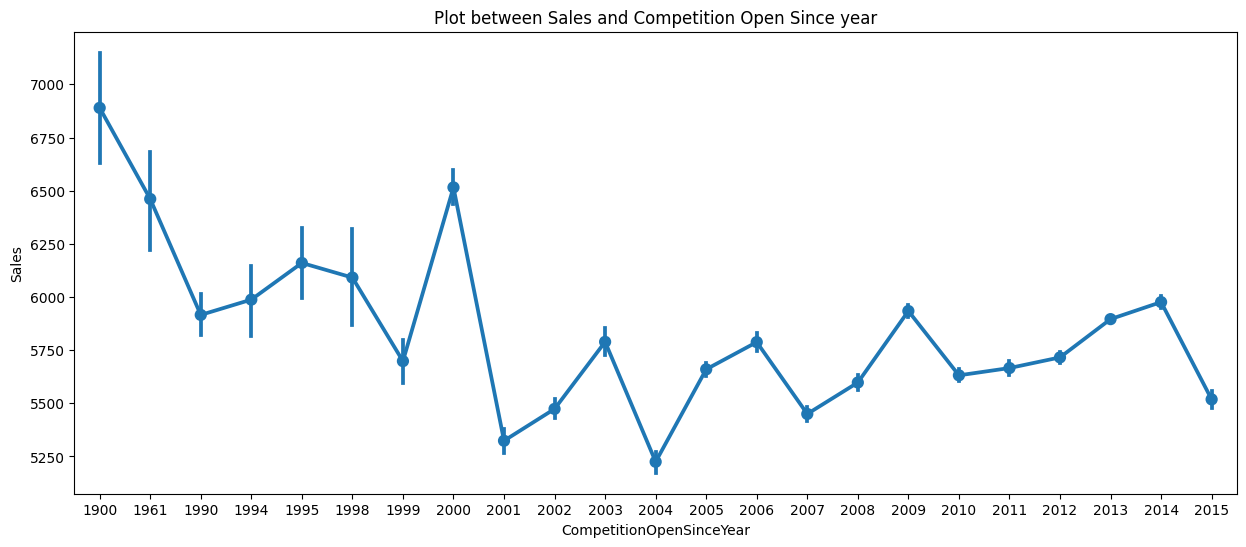

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

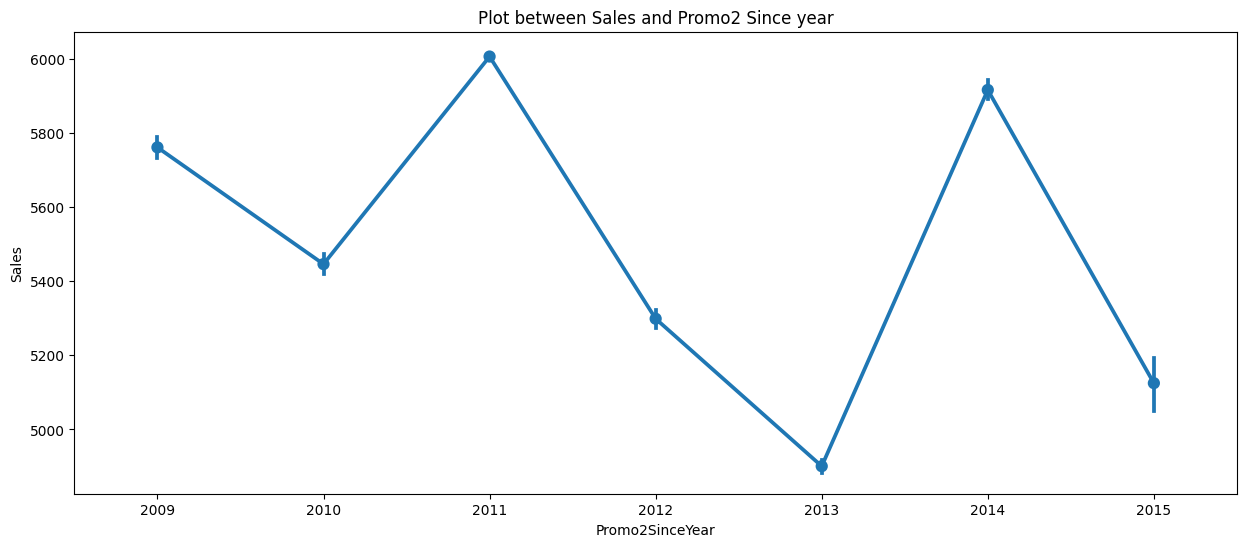

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Promo2 Since year')


Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.



Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

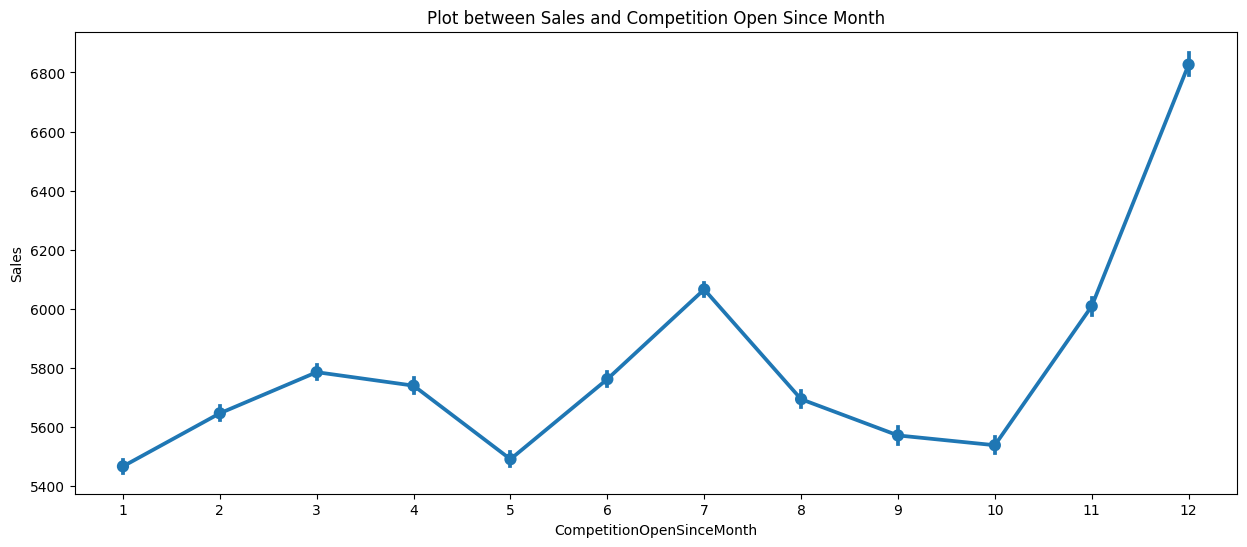

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

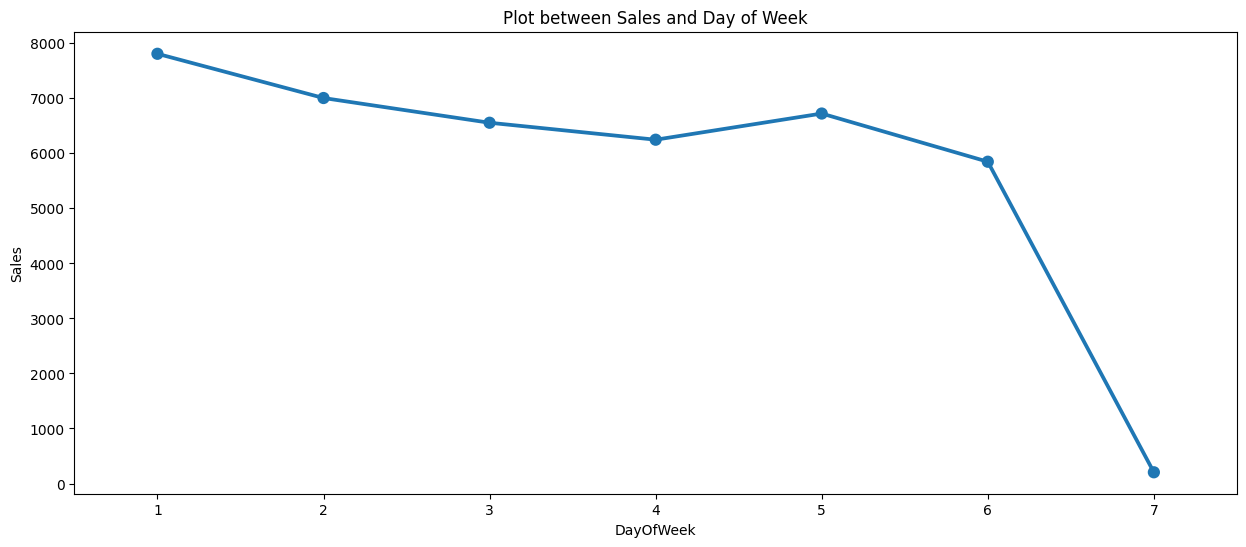

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1)
plt.title('Plot between Sales and Day of Week')


Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

BoxPlot of sales between Assortment and store type

In [ ]:
#sns.catplot(data= final1, x= 'CompetitionOpenSinceMonth', y= 'Customers', col='StoreType', palette='plasma',
  #                             hue= 'StoreType', row='Promo', color= 'c')

Text(0.5, 1.0, 'Boxplot For Sales Values')

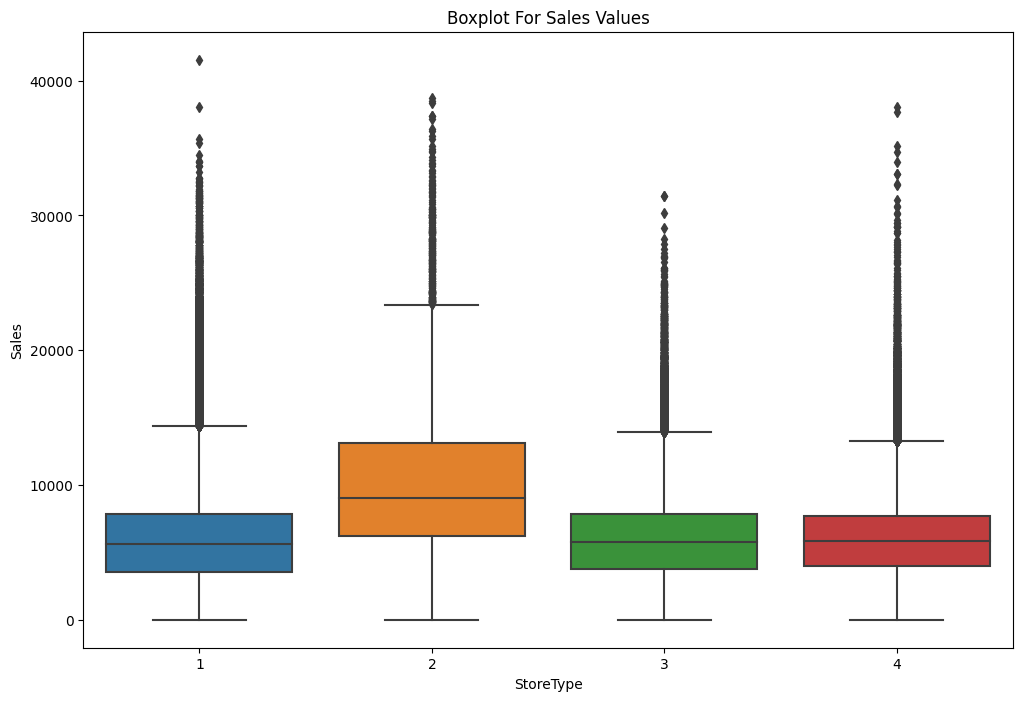

In [ ]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

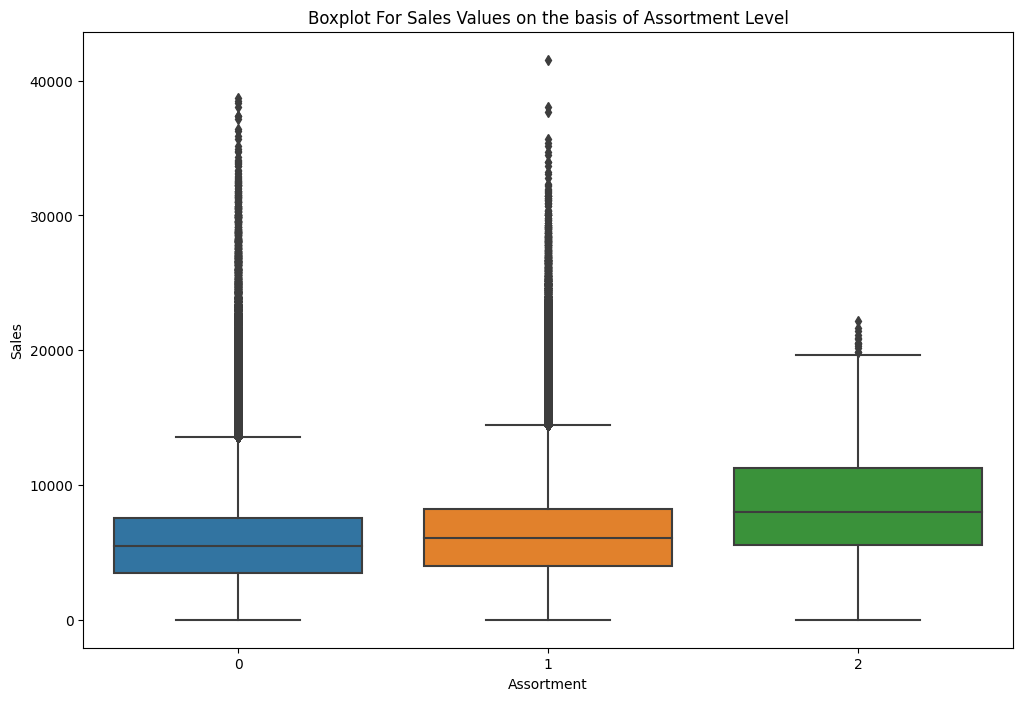

In [ ]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

Plot between Dayof Week and Open & promo.

Text(0.5, 1.0, 'Store Daily Open Countplot')

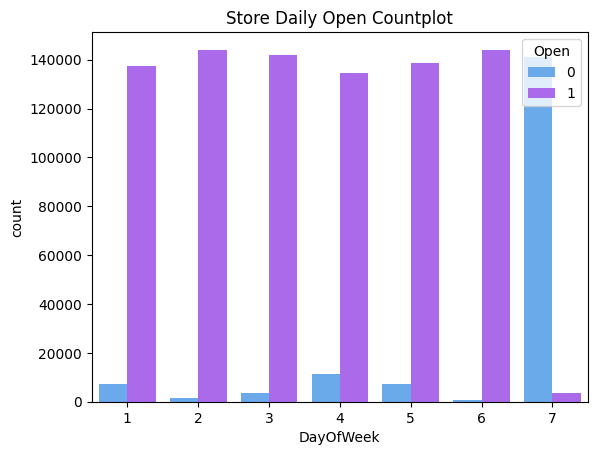

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

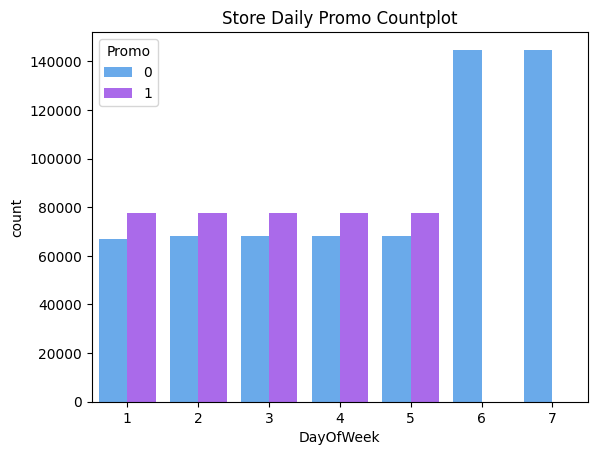

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='cool')
plt.title('Store Daily Promo Countplot')

PROMO

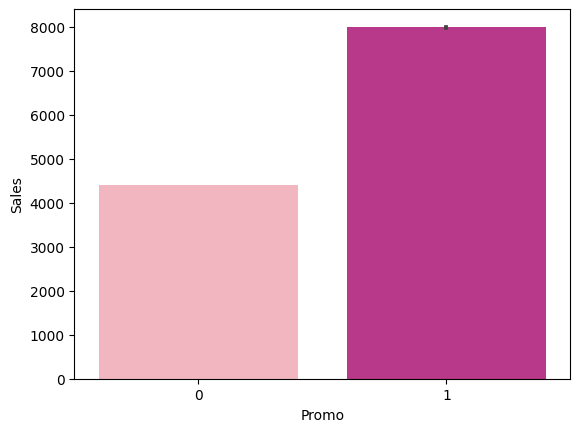

In [ ]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='RdPu')

Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

StateHoliday and SchoolHoliday

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

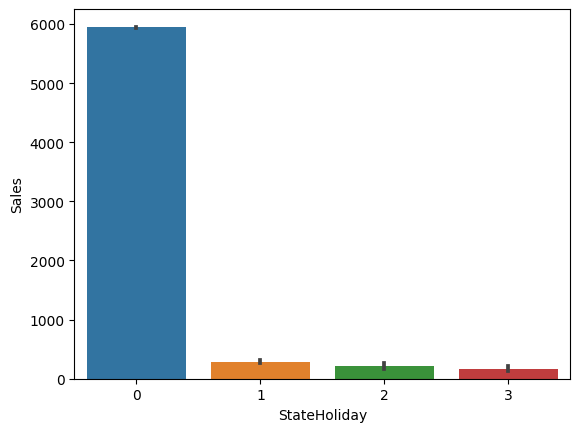

In [ ]:
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1)

Sales during school holiday

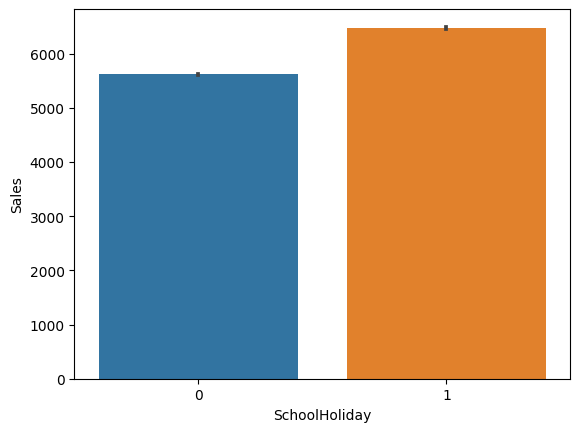

In [ ]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1)


We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

STORE  TYPE

In [ ]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

<ipython-input-43-bfdac59f9466>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-43-bfdac59f9466>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-43-bfdac59f9466>:9: FutureWarning: The default value of numeric_only in DataF

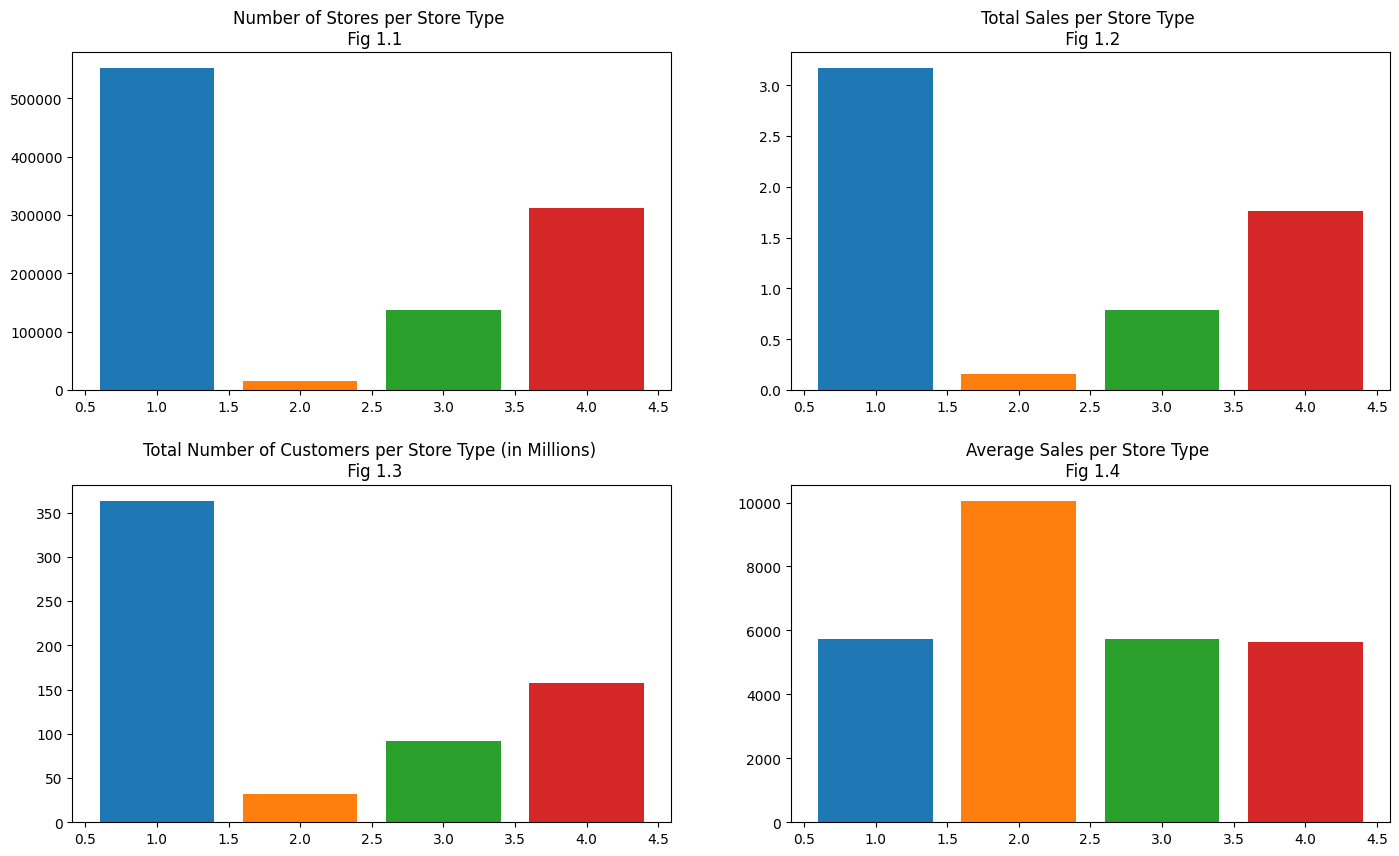

In [ ]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.

Assortments

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

a means basic things
b means extra things
c means extended things so the highest variety of products.


StoreType  Assortment
1          0             346389
           1             205238
2          0               6594
           1                942
           2               8294
3          0              70878
           1              65962
4          0             113584
           1             199328
Name: Assortment, dtype: int64

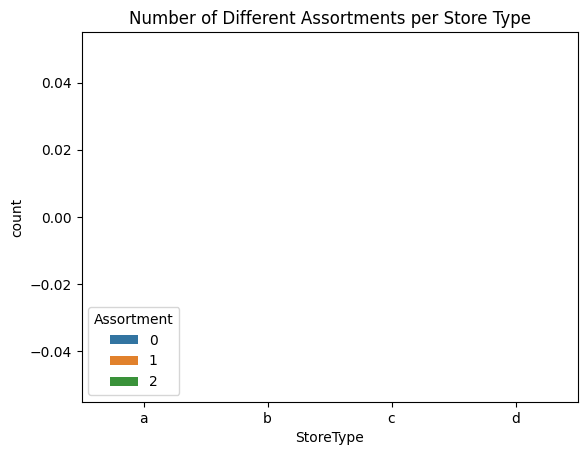

In [ ]:
Storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

Conclusions from EDA


Feature Engineering
Correlation

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']


In [ ]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final1[col]
    label = final1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final1[col], final1['Sales'], 1)
    y_hat = np.poly1d(z)(final1[col])

    plt.plot(final1[col], y_hat, "r--", lw=1)

plt.show()

NameError: ignored

<ipython-input-47-1b0f911ba5d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

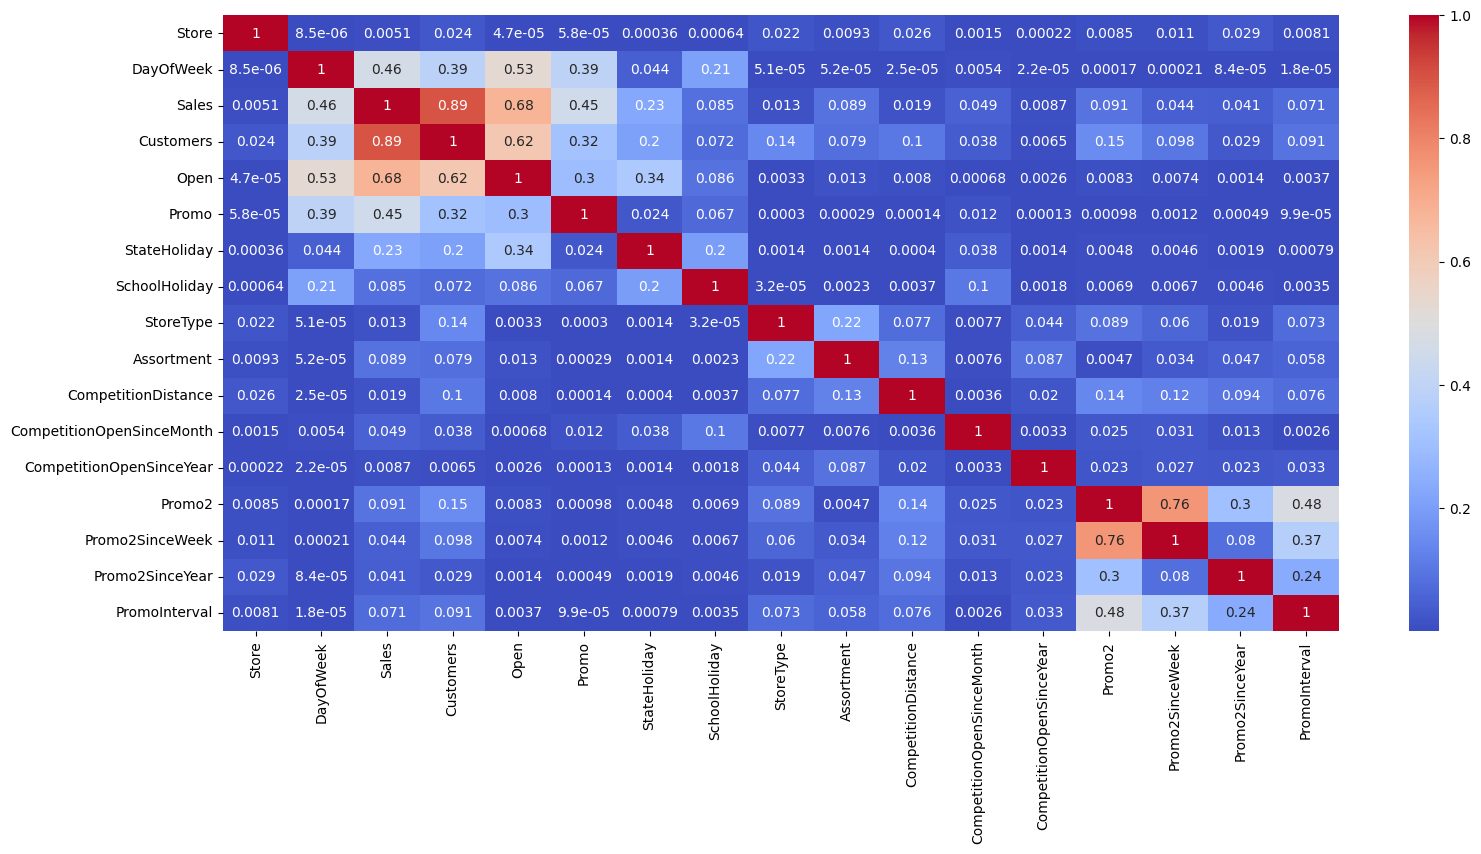

In [ ]:
 ## Correlation
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.018779
1,DayOfWeek,8.353792
2,Customers,5.383906
3,Open,13.449959
4,Promo,1.994761
5,StateHoliday,1.313550
6,SchoolHoliday,1.338016
7,StoreType,3.991507
8,Assortment,2.063116
9,CompetitionDistance,1.606804


Multicolinearity of columns like 'Promo2SinceYear'and'competitionOpenSinceYear
 is pretty high so we decided to drop it

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2SinceYear','CompetitionOpenSinceYear']]])

,variables,VIF
0,Store,3.683435
1,DayOfWeek,3.931642
2,Customers,5.338099
3,Open,9.350057
4,Promo,1.916934
5,StateHoliday,1.183210
6,SchoolHoliday,1.330756
7,StoreType,3.748386
8,Assortment,2.049362
9,CompetitionDistance,1.581674


Now for each feature VIF values below 10. That's look pretty fine.

Analysis on Sales - Dependent variable

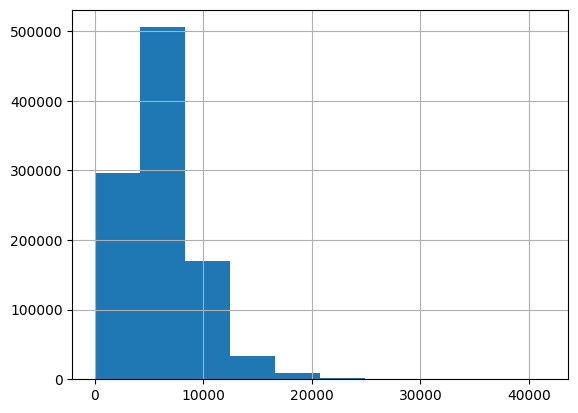

In [ ]:
pd.Series(final1['Sales']).hist()
plt.show()

Now checking for number of sales =0.

In [ ]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817

We see that 172817 times store is were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [ ]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,0,1270,7,2008,0,0,2011,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,0,570,7,2007,1,13,2010,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,0,14130,7,2006,1,14,2011,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,1,620,7,2009,0,0,2011,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,0,29910,7,2015,0,0,2011,0


In [ ]:
new_df.shape

(844392, 18)

PromoInterval to be changed into dummies as it is categorical feature.

In [ ]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,PromoInterval_1,PromoInterval_2
0,1,5,2015-07-31,5263,555,1,1,0,1,3,0,1270,7,2008,0,0,2011,1,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,0,570,7,2007,1,13,2010,1,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,0,14130,7,2006,1,14,2011,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,1,620,7,2009,0,0,2011,1,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,0,29910,7,2015,0,0,2011,1,0,0


MODEL TRAINING


In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

MODEL 1 (excluding rows which has sales =0)

We were confused about whether to include rows where sales value is 0.So first we built a model excluding sales value and then including those values

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_1',
 'PromoInterval_2']

In [ ]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

NameError: ignored

Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7587636792029864

In [ ]:
reg.coef_

array([-1.58695684e-01, -6.70651735e+01,  6.38585583e+00, -7.67386155e-13,
        1.29016742e+03, -1.36209756e+03,  3.54085057e+01,  3.08003566e+02,
        2.12073397e+01,  3.28076078e-02,  3.00384209e+01, -2.32835251e-01,
        8.45844084e+01,  1.07901749e+01,  1.47985106e+02,  1.93386837e+01,
       -1.67323790e+02])

In [ ]:
reg.intercept_

982.1385857016494

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([4691.29988348, 7703.72142651, 5878.35956066, ..., 5361.46307418,
       9555.26069655, 8689.87737662])

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([ 8057.70565569,  6344.07050188,  7234.69578494, ...,
        6052.18818987,  8848.45164351, 11429.11828139])

In [ ]:
y_test

array([ 5203,  8590,  6465, ...,  7499, 11606, 17389])

In [ ]:
y_train

array([ 9007,  7374,  7701, ...,  6496,  9184, 11570])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2333562.6714859195
RMSE : 1527.6002983391695


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7580236314823222


LASSO

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(X_test)
L1.score(X_test, y_test)

0.7580304370133467

In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5203,4691.644218
1,8590,7703.298507
2,6465,5878.906648
3,7250,5711.262652
4,4339,4487.446793
...,...,...
168874,10096,9930.747029
168875,12400,10813.805863
168876,7499,5364.777619
168877,11606,9554.501449


RIDGE

In [ ]:

L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([4691.30050647, 7703.7184333 , 5878.36151544, ..., 5361.46536087,
       9555.25742209, 8689.8782756 ])

In [ ]:
L2.score(X_test, y_test)

0.758023674712535

In [ ]:
sales_mean=final1[dependent_variables].mean()


DECISION TREE

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 1953288.2940254177
RMSE : 1397.600906562892
RMPSE : 0.2420583175999375
R2 : 0.7974557898822592


MODEL 2 (By taking whole Dataset)
We use dummy variables for the column 'PromoInterval'

In [ ]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,PromoInterval_1,PromoInterval_2
0,1,5,2015-07-31,5263,555,1,1,0,1,3,0,1270,7,2008,0,0,2011,1,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,0,570,7,2007,1,13,2010,1,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,0,14130,7,2006,1,14,2011,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,1,620,7,2009,0,0,2011,1,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,0,29910,7,2015,0,0,2011,1,0,0


In [ ]:
final1.shape

(1017209, 20)

We define dependent and independent variables and convert them into arrays

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])
# Create the data of independent variables
U = final1[indep_var].values

# Create the dependent variable data
v = final1[dep_var].values

In [ ]:
final1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,PromoInterval_1,PromoInterval_2
0,5,555,1,1,0,1,3,0,1270,7,2008,0,0,1,0,0
1,5,625,1,1,0,1,1,0,570,7,2007,1,13,1,0,0
2,5,821,1,1,0,1,1,0,14130,7,2006,1,14,1,0,0
3,5,1498,1,1,0,1,3,1,620,7,2009,0,0,1,0,0
4,5,559,1,1,0,1,1,0,29910,7,2015,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,1,0,1900,1,2014,1,31,1,0,0
1017205,2,0,0,0,1,1,3,1,1880,1,2006,0,0,1,0,0
1017206,2,0,0,0,1,1,1,1,9260,1,2013,0,0,1,0,0
1017207,2,0,0,0,1,1,1,1,870,1,2013,0,0,1,0,0


We do a train test split keeping the test size as 0.25

In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(762906, 16)
(254303, 16)


LINEAR REGRESSION

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7374.74867038, 12598.34632663,  9030.56312351, ...,
        6187.89710788, 10920.19007663,   -47.75523587])

In [ ]:
linear_regression.score(U_train, v_train)

0.8656375182305237

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7374.748670
1,6221,12598.346327
2,8132,9030.563124
3,20916,11366.078749
4,5472,6636.846327
...,...,...
254298,7554,8152.791639
254299,5646,6750.326795
254300,5580,6187.897108
254301,10702,10920.190077


In [ ]:
sales_mean=final1[dep_var].mean()
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1977242.3962606462
RMSE : 1406.1445147141335
RMPSE : 0.2435380328788926
R2 : 0.8659121604511344


In [ ]:
from sklearn.metrics import accuracy_score

Decession tree

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1841844.230004808
RMSE : 1357.1456185703905
RMPSE : 0.2350516400115775
R2 : 0.8750942656024596


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6344.743423
1,6221,5680.135567
2,8132,8930.765753
3,20916,11626.599034
4,5472,5390.864748
...,...,...
254298,7554,7569.630968
254299,5646,5533.817991
254300,5580,6741.976364
254301,10702,11280.055753


Lasso

In [ ]:
lasso = Lasso(alpha = 2.0)
lasso.fit(U_train, v_train)

Lasso(alpha=2.0)

In [ ]:
v_pred_lasso = lasso.predict(U_test)
lasso.score(U_train, v_train)


0.8656342686260899

In [ ]:
pd.DataFrame(zip(v_test, v_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,7285,7382.690410
1,6221,12591.453993
2,8132,9025.526348
3,20916,11343.586902
4,5472,6632.135624
...,...,...
254298,7554,8151.551398
254299,5646,6734.518189
254300,5580,6177.896698
254301,10702,10919.687651


Ridge

In [ ]:
ridge = Ridge(alpha = 0.5)
ridge.fit(U_train, v_train)

Ridge(alpha=0.5)

In [ ]:
v_pred_rid=ridge.predict(U_test)
ridge.score(U_test, v_test)


0.865912152280118

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rid)
print("R2 :" ,r2)

MSE : 1977242.5167494246
RMSE : 1406.1445575578011
RMPSE : 0.24353804029922704
R2 : 0.865912152280118


Random forest

In [ ]:
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(U_train, v_train)
v_pred_rf=random_forest.predict(U_test)
MSE  = mean_squared_error(v_test, v_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rf)
print("R2 :" ,r2)

MSE : 1119517.6443637866
RMSE : 1058.0726082664585
RMPSE : 0.1832535126822569
R2 : 0.9240792618277507


In [ ]:
pd.DataFrame(zip(v_test, v_pred_rf), columns = ['actual', 'pred'])

,actual,pred
0,7285,7053.768972
1,6221,6188.029465
2,8132,8767.451878
3,20916,14763.208719
4,5472,6055.502451
...,...,...
254298,7554,7712.227373
254299,5646,6522.878990
254300,5580,6800.614676
254301,10702,10786.753241


***CONCLUSION FROM EDA***

From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.
From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
Plot between Promotion and Sales shows that promotion helps in increasing Sales.
Type of Store plays an important role in opening pattern of stores.
All Type ‘b’ stores never closed except for refurbishment or other reason.
All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends..
We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
***Conclusion From model***
 We saw that Sales column contains 172817 rows with 0 sale. So we created a new data frame in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around 74%. We were also curious about the total dataset (including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about 92% which is far better than previous model. So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has 172817 rows which is quite large and therefore we decided not to remove those values. We got our best rmpse score from Random Forest model,we tried taking an optimum parameter so that our model doesnt overfit.